In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
ds = pd.read_csv("/kaggle/input/iris/Iris.csv")

#We drop Id because it is not relevant in this case.
ds.drop(columns = "Id",axis=1,inplace = True)

ds["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Import necessary modules

In [3]:
import numpy as np # linear algebra
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

ds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Taking a look at the Sepal length and width, let's see if there is any relation between that to the species.

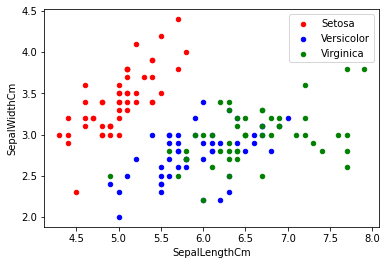

In [4]:
#fig = plt.figure(figsize=(8,5))
ax1 = ds[ds.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm', label='Setosa',color='red')
ds[ds.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm', label='Versicolor',color='blue',ax=ax1)
ds[ds.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm', label='Virginica',color='green',ax=ax1)
plt.show()

As we can see, there is a variation in sepal width
Taking a look at the Sepal length and width, let's see if there is any relation between that to the species.

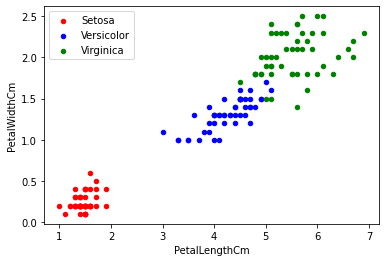

In [5]:
ax1 = ds[ds.Species=='Iris-setosa'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm', label='Setosa',color='red')
ds[ds.Species=='Iris-versicolor'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm', label='Versicolor',color='blue',ax=ax1)
ds[ds.Species=='Iris-virginica'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm', label='Virginica',color='green',ax=ax1)
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(ds, test_size = 0.3)
train_y = train["Species"]
train_x = train.drop(columns = "Species",axis=1)
test_y = test["Species"]
test_x = test.drop(columns = "Species",axis=1)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score  #for accuracy_score

logreg = LogisticRegression(solver = "lbfgs",max_iter=1000,random_state = 1)
logreg.fit(train_x, train_y)
y_predicted_lr = logreg.predict(test_x)
print('The accuracy of the Logistic Regression is',round(accuracy_score(y_predicted_lr,test_y)*100,2))

The accuracy of the Logistic Regression is 100.0


In [8]:
from sklearn import svm 

model = svm.SVC() #select the algorithm
model.fit(train_x,train_y) # we train the algorithm with the training data and the training output
prediction=model.predict(test_x) #now we pass the testing data to the trained algorithm
print('The accuracy of the SVM is:',round(accuracy_score(prediction,test_y)*100,2))#now we check the accuracy of the algorithm. 

The accuracy of the SVM is: 100.0
